In [39]:
import pandas as pd
from sklearn.cluster import DBSCAN

In [40]:
df = pd.read_csv('income.csv')

In [41]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
df.Age = scaler.fit_transform(df[['Age']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])

In [45]:
import matplotlib.pyplot as plt

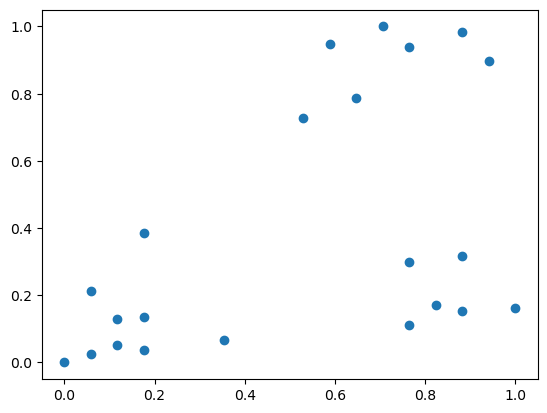

In [46]:
plt.scatter(df.Age, df['Income($)'])

In [47]:
model = DBSCAN(min_samples=6,eps = 0.3)

In [48]:
#knn_classifier.fit(df[['Age', 'Income($)']],target)


In [49]:
model.fit_predict(df[['Age','Income($)']])

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [50]:
from sklearn.cluster import KMeans

In [51]:
model = KMeans(n_clusters=3)

In [52]:
model.fit_predict(df[['Age','Income($)']])

C:\Users\Gaurav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gaurav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [53]:
predictions = model.fit_predict(df[['Age','Income($)']])

C:\Users\Gaurav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gaurav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [54]:
predictions = pd.DataFrame(predictions, columns=['Class'])

In [55]:
predictions

,Class
0,0
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,1
9,1


In [56]:
df = pd.concat([df,predictions],axis=1)

In [72]:
df1 = df[df['Class'] == 0]

In [73]:
df2 = df[df['Class'] == 1]

In [59]:
df3 = df[df['Class'] == 2]

In [60]:
import matplotlib.pyplot as plt

In [61]:
df1

,Name,Age,Income($),Class
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
11,Tom,0.000000,0.000000,0
12,Arnold,0.058824,0.025641,0
13,Jared,0.117647,0.051282,0
14,Stark,0.176471,0.038462,0
15,Ranbir,0.352941,0.068376,0


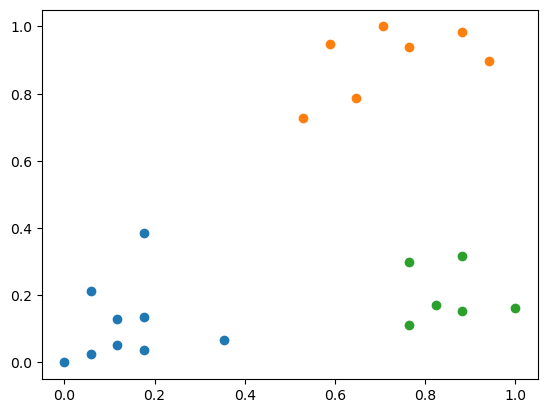

In [62]:
plt.scatter(df1['Age'],df1['Income($)'])
plt.scatter(df2['Age'],df2['Income($)'])
plt.scatter(df3['Age'],df3['Income($)'])

<Axes: xlabel='Age', ylabel='Income($)'>

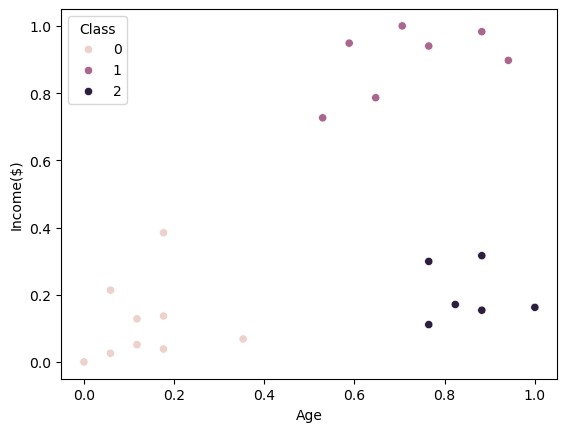

In [63]:
import seaborn as sns
sns.scatterplot(data=df,x='Age',y='Income($)', hue='Class')

<Axes: xlabel='Age', ylabel='Count'>

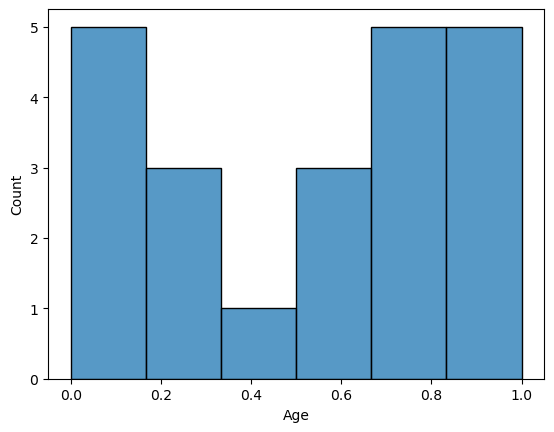

In [65]:
sns.histplot(data=df, x='Age')

In [68]:
sns.kde(data=df,x='Age',y='Income($)')

AttributeError: module 'seaborn' has no attribute 'kde'

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_18592\878910567.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Age'], label='Age', shade=True)


<Axes: xlabel='Age', ylabel='Density'>

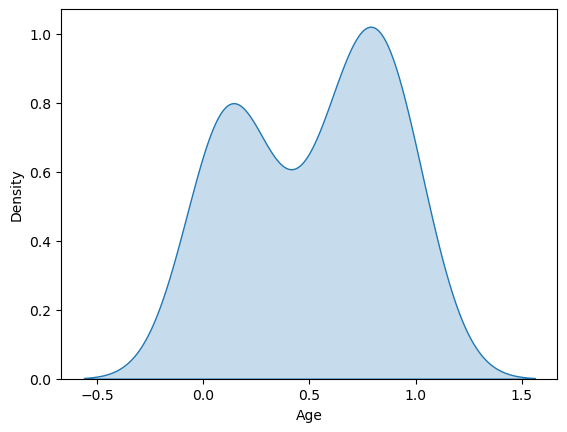

In [69]:
sns.kdeplot(data=df['Age'], label='Age', shade=True)


In [84]:
df4 = pd.concat([df1,df2],axis=0)

In [85]:
print(type(df1))
print(type(df2))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [86]:
df4

,Name,Age,Income($),Class
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
11,Tom,0.000000,0.000000,0
12,Arnold,0.058824,0.025641,0
13,Jared,0.117647,0.051282,0
14,Stark,0.176471,0.038462,0
15,Ranbir,0.352941,0.068376,0
4,Kory,0.941176,0.897436,1
